In [65]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale, minmax_scale, robust_scale

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve,GridSearchCV


from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from statsmodels.api import Logit

from statsmodels.api import Logit
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
import graphviz

from sklearn.decomposition import PCA
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
plt.rc('font', family = 'AppleGothic')

# 데이터 전처리

In [113]:
df_raw = pd.read_csv("/Users/wonjeonglee/Documents/포스코아카데미/빅데이터분석/SCALE불량.csv", engine ="python", encoding = "CP949")


# 스트링 인트로 변환 
df_raw['SCALE'] = df_raw['SCALE'].map(({'불량':0, '양품':1}))



df_raw['FUR_NO_ROW'] = df_raw['FUR_NO_ROW'].map(({1:'1번', 2:'2번'}))



In [114]:
# 결측치 파악
df_raw.isnull().sum()

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

In [115]:
# 데이터 타입 확인
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
PLATE_NO             720 non-null object
ROLLING_DATE         720 non-null object
SCALE                720 non-null int64
SPEC                 720 non-null object
STEEL_KIND           720 non-null object
PT_THK               720 non-null float64
PT_WDTH              720 non-null int64
PT_LTH               720 non-null int64
PT_WGT               720 non-null int64
FUR_NO               720 non-null object
FUR_NO_ROW           720 non-null object
FUR_HZ_TEMP          720 non-null int64
FUR_HZ_TIME          720 non-null int64
FUR_SZ_TEMP          720 non-null int64
FUR_SZ_TIME          720 non-null int64
FUR_TIME             720 non-null int64
FUR_EXTEMP           720 non-null int64
ROLLING_TEMP_T5      720 non-null int64
HSB                  720 non-null object
ROLLING_DESCALING    720 non-null int64
WORK_GR              720 non-null object
dtypes: float64(1), int64(12), object(8)
memo

In [116]:
#-------------------------데이터 드랍--------------------------------------

df_raw.drop("SPEC", axis=1, inplace=True)
df_raw.drop("PLATE_NO", axis=1, inplace=True)
df_raw.drop("ROLLING_DATE", axis=1, inplace=True)
df_raw.drop("FUR_EXTEMP", axis=1, inplace=True)





df_raw

,SCALE,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,1,T1,32.25,3707,15109,14180,1호기,1번,1144,116,1133,59,282,934,적용,8,2조
1,1,T1,32.25,3707,15109,14180,1호기,2번,1144,122,1135,53,283,937,적용,8,2조
2,1,T8,33.27,3619,19181,18130,2호기,1번,1129,116,1121,55,282,889,적용,8,3조
3,1,T8,33.27,3619,19181,18130,2호기,2번,1152,125,1127,68,316,885,적용,8,3조
4,1,T8,38.33,3098,13334,12430,3호기,1번,1140,134,1128,48,314,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0,C0,20.14,3580,38639,21870,3호기,1번,1172,72,1164,62,245,1005,적용,8,2조
716,1,C0,15.08,3212,48233,18340,2호기,1번,1150,61,1169,61,238,947,적용,10,1조
717,1,C0,16.60,3441,43688,19590,2호기,2번,1169,65,1163,77,247,948,적용,10,4조
718,1,C0,15.59,3363,48740,80240,3호기,2번,1179,86,1163,45,243,940,적용,10,2조


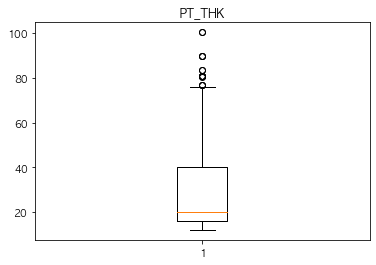

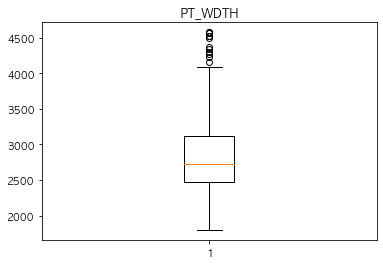

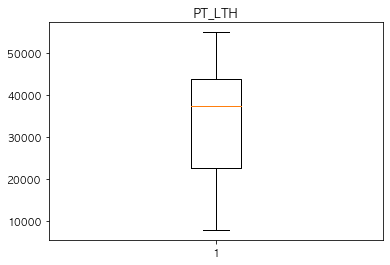

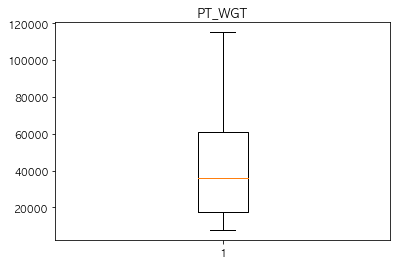

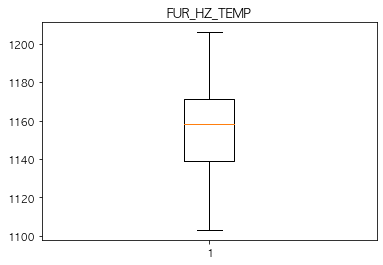

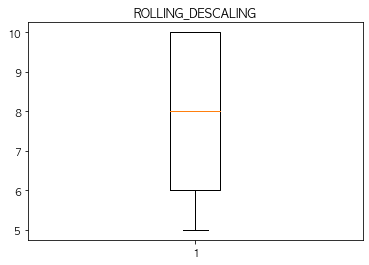

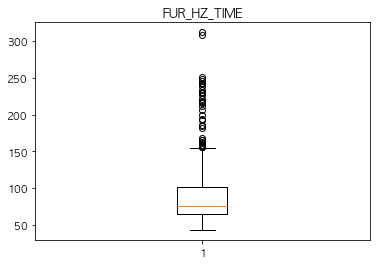

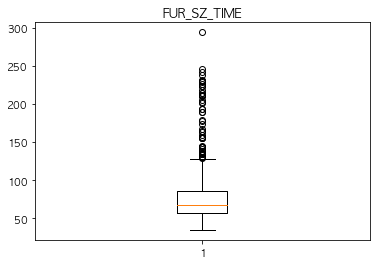

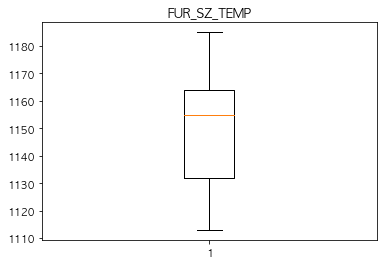

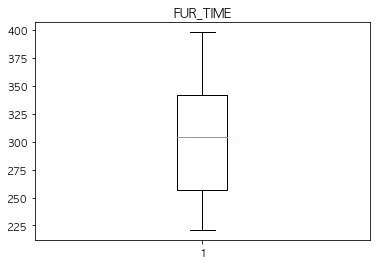

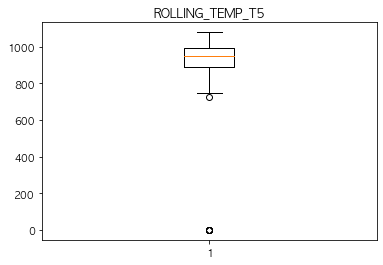

In [117]:
# 이상치 확인을 위해 연속변수를 대상으로 boxplot 그리기

cont_values = ['PT_THK','PT_WDTH','PT_LTH','PT_WGT','FUR_HZ_TEMP','ROLLING_DESCALING',
               'FUR_HZ_TIME', 'FUR_SZ_TIME', 'FUR_SZ_TEMP', 'FUR_TIME','ROLLING_TEMP_T5']

for i in cont_values:
    plt.boxplot(df_raw[i])
    plt.title(i)
    plt.show()

In [118]:
from scipy import stats

# 3씨그마 이후를 이상치라고 판단
zscore_threshold = 3

cont_list = ['PT_THK', 'PT_WDTH', 'FUR_HZ_TIME', 'FUR_SZ_TIME',
             'ROLLING_TEMP_T5']

for i in cont_list:
    df_temp = df_raw[i]
    print(i)
    print(df_temp[(np.abs(stats.zscore(df_temp)) > zscore_threshold)].values)
    print()

PT_THK
[ 89.63  89.63  89.63 100.34 100.34]

PT_WDTH
[4570 4373 4528 4528 4490 4575 4575]

FUR_HZ_TIME
[308 312 239 226 249 243 217 243 234 221 229 229 251 245 219 216 229 231
 206 241 212]

FUR_SZ_TIME
[223 294 210 231 238 242 212 218 212 246 230 230 211 229 202 201 226 224
 223 214 194 215 190 205 190 194]

ROLLING_TEMP_T5
[0 0 0 0 0 0]



In [119]:
# temp는 확실한 이상치이기 때문에
# 평균값으로 이상치를 대체해준다.

df_raw['ROLLING_TEMP_T5'].replace(0,int(df_raw['ROLLING_TEMP_T5'].mean()),inplace=True)



In [120]:
#################################################################################################################

# -------------------------------- FUR_SZ_TEMP - ROLLING_TEMP_T5  변수 추가 -----------------------------

df_raw['SUB_TEMP'] = df_raw['FUR_SZ_TEMP'] - df_raw['ROLLING_TEMP_T5']
₩



df_raw[['FUR_SZ_TEMP','ROLLING_TEMP_T5','SUB_TEMP']]

,FUR_SZ_TEMP,ROLLING_TEMP_T5,SUB_TEMP
0,1133,934,199
1,1135,937,198
2,1121,889,232
3,1127,885,242
4,1128,873,255
...,...,...,...
715,1164,1005,159
716,1169,947,222
717,1163,948,215
718,1163,940,223


In [122]:
############### 파생변수 생성으로 인한 기존 변수 삭제 ####################3
df_raw.drop("FUR_SZ_TEMP", axis=1, inplace=True)

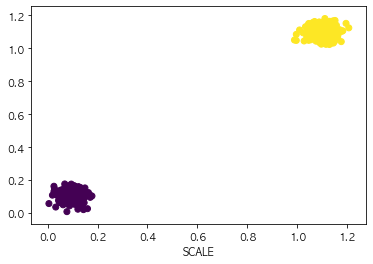

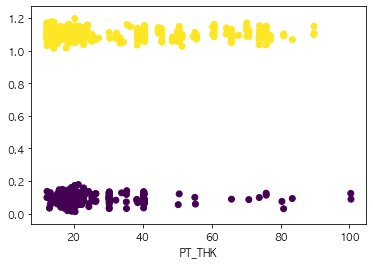

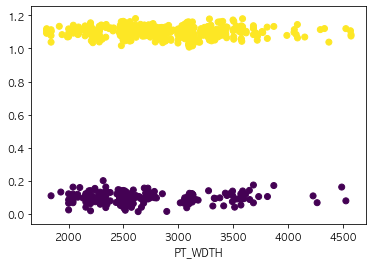

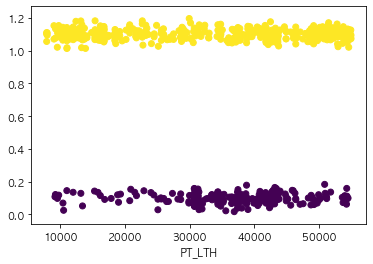

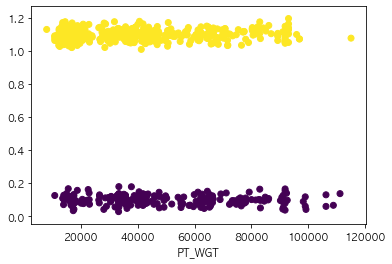

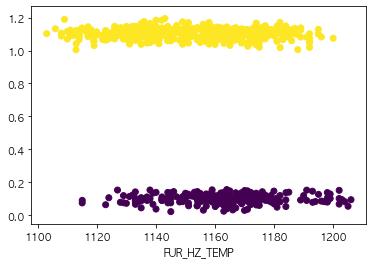

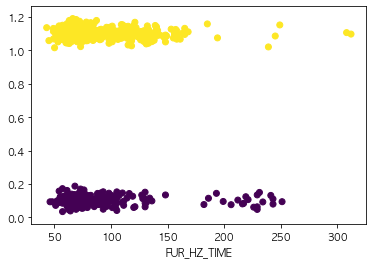

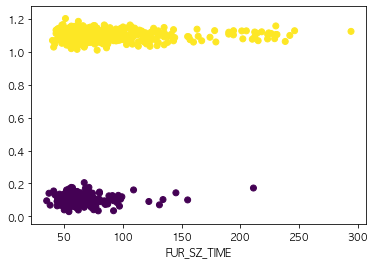

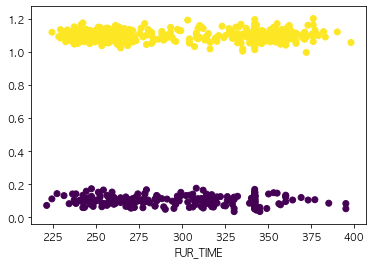

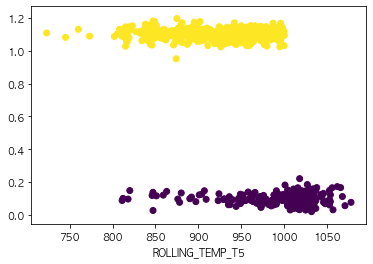

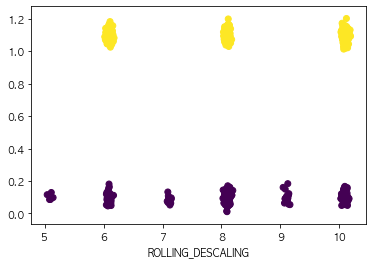

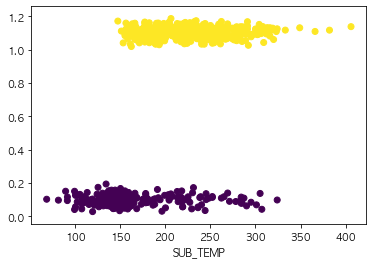

In [123]:
### 연속형 설명변수들과 목표변수와 scatter 

plt.rc('font', size = 10)

for i in df_raw.columns:
    try:
        plt.scatter(df_raw[i]+np.random.normal(0.1,0.03,len(df_raw)),
                    df_raw['SCALE']+np.random.normal(0.1,0.03,len(df_raw)),
                   c = df_raw['SCALE'])
        plt.xlabel(i)
        plt.show()
    except Exception:
        pass

In [124]:
# rolling descaling이 홀수이면
# 항상 불량이기때문에 다른 변수의 영향을 조금더 보고자
# 홀수인 경우를 제거해준다.

df_raw = df_raw.query('ROLLING_DESCALING != 5 & \
                        ROLLING_DESCALING != 7 & \
                        ROLLING_DESCALING != 9')

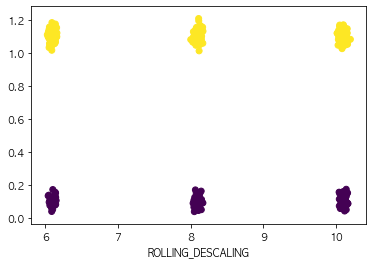

In [125]:
# 홀수가 삭제되어 변형된 데이터 확인

plt.scatter(df_raw['ROLLING_DESCALING']+np.random.normal(0.1,0.03,len(df_raw)),
            df_raw['SCALE']+np.random.normal(0.1,0.03,len(df_raw)),
           c = df_raw['SCALE'])
plt.xlabel('ROLLING_DESCALING')
plt.show()

In [126]:
# ROLLING DESCALING 열을 삭제해준다.

df_raw.drop('ROLLING_DESCALING', axis=1, inplace=True)

In [127]:
# SCATTER를 그리기 위해 변형
df_raw['HSB'] = df_raw['HSB'].map(({'미적용':0, '적용':1}))

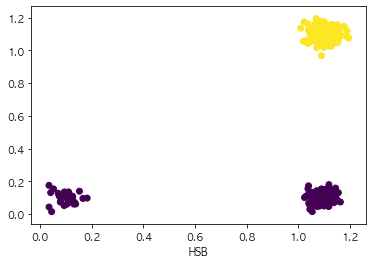

In [128]:
# HSB와 SCALE의 상관관계 분석

plt.scatter(df_raw['HSB']+np.random.normal(0.1,0.03,len(df_raw)),
            df_raw['SCALE']+np.random.normal(0.1,0.03,len(df_raw)),
           c = df_raw['SCALE'])
plt.xlabel('HSB')
plt.show()

In [129]:
# HSB가 미실시인 경우를 삭제해준다.

df_raw = df_raw.query('HSB == 1')

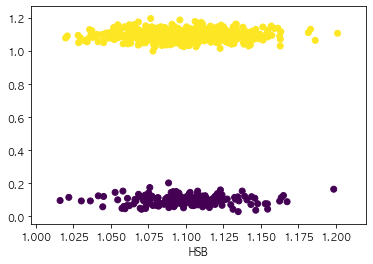

In [130]:
# HSB 미실시인 것 제거 확인

plt.scatter(df_raw['HSB']+np.random.normal(0.1,0.03,len(df_raw)),
            df_raw['SCALE']+np.random.normal(0.1,0.03,len(df_raw)),
           c = df_raw['SCALE'])
plt.xlabel('HSB')
plt.show()

In [140]:
# 이제 HSB 열을 제거해준다.
df_raw.drop('HSB',axis=1, inplace=True)

In [141]:
df_raw.columns

Index(['SCALE', 'STEEL_KIND', 'PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT',
       'FUR_NO', 'FUR_NO_ROW', 'FUR_HZ_TEMP', 'FUR_HZ_TIME', 'FUR_SZ_TIME',
       'FUR_TIME', 'ROLLING_TEMP_T5', 'WORK_GR', 'SUB_TEMP'],
      dtype='object')

In [142]:
df_raw = df_raw.reset_index(drop=True)

In [143]:
# 목표변수와 설명변수 데이터 분리 
df_x = df_raw.drop("SCALE", axis = 1, inplace = False) 
df_y = df_raw["SCALE"]


# train, test 데이터 분리

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)

print(df_train_x.shape)
print(df_train_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(452, 14)
(452,)
(195, 14)
(195,)


### 7:3 / 8:2 중에 7:3으로 나눈이유
데이터수가 많으면 train데이터에 더 많이 할당하는데 
데이터가 많지 않으므로 7:3 으로 나눴다.

In [144]:
# ---------------스케일 변환 대상 변수- 선택 ----------------------

df_num = df_x.select_dtypes(exclude = "object")


df_char = df_x.select_dtypes(include = "object")

df_num.head()


,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,SUB_TEMP
0,32.25,3707,15109,14180,1144,116,59,282,934,199
1,32.25,3707,15109,14180,1144,122,53,283,937,198
2,33.27,3619,19181,18130,1129,116,55,282,889,232
3,33.27,3619,19181,18130,1152,125,68,316,885,242
4,38.33,3098,13334,12430,1140,134,48,314,873,255


In [145]:
df_char.head()

,STEEL_KIND,FUR_NO,FUR_NO_ROW,WORK_GR
0,T1,1호기,1번,2조
1,T1,1호기,2번,2조
2,T8,2호기,1번,3조
3,T8,2호기,2번,3조
4,T8,3호기,1번,1조


In [146]:
# ----------------------숫자 변수------스케일 변환 -------------------------



v_feature_name = df_num.columns

scaler=StandardScaler()
df_scaled = scaler.fit_transform(df_num)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()


,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,SUB_TEMP
0,0.138205,1.781355,-1.359887,-1.084567,-0.524120,0.715940,-0.558922,-0.443900,-0.105966,-0.161340
1,0.138205,1.781355,-1.359887,-1.084567,-0.524120,0.874738,-0.720673,-0.421751,-0.060702,-0.179184
2,0.191260,1.609586,-1.068301,-0.924132,-1.244600,0.715940,-0.666756,-0.443900,-0.784924,0.427511
3,0.191260,1.609586,-1.068301,-0.924132,-0.139864,0.954137,-0.316295,0.309159,-0.845276,0.605950
4,0.454457,0.592630,-1.486990,-1.155646,-0.716248,1.192334,-0.855466,0.264861,-1.026332,0.837922


In [147]:
# -------------------------string 변수 더미화----------------------------------------

df_dummy = pd.get_dummies(df_char)
df_dummy


,STEEL_KIND_C0,STEEL_KIND_C1,STEEL_KIND_C3,STEEL_KIND_T0,STEEL_KIND_T1,STEEL_KIND_T3,STEEL_KIND_T5,STEEL_KIND_T7,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,FUR_NO_ROW_1번,FUR_NO_ROW_2번,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
643,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
644,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
645,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0


In [148]:
# --------------------- 데이터 합치기 num + char -------------------------------
df_x = pd.concat([df_dummy, df_scaled], axis=1)
df_x



,STEEL_KIND_C0,STEEL_KIND_C1,STEEL_KIND_C3,STEEL_KIND_T0,STEEL_KIND_T1,STEEL_KIND_T3,STEEL_KIND_T5,STEEL_KIND_T7,STEEL_KIND_T8,FUR_NO_1호기,...,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,SUB_TEMP
0,0,0,0,0,1,0,0,0,0,1,...,0.138205,1.781355,-1.359887,-1.084567,-0.524120,0.715940,-0.558922,-0.443900,-0.105966,-0.161340
1,0,0,0,0,1,0,0,0,0,1,...,0.138205,1.781355,-1.359887,-1.084567,-0.524120,0.874738,-0.720673,-0.421751,-0.060702,-0.179184
2,0,0,0,0,0,0,0,0,1,0,...,0.191260,1.609586,-1.068301,-0.924132,-1.244600,0.715940,-0.666756,-0.443900,-0.784924,0.427511
3,0,0,0,0,0,0,0,0,1,0,...,0.191260,1.609586,-1.068301,-0.924132,-0.139864,0.954137,-0.316295,0.309159,-0.845276,0.605950
4,0,0,0,0,0,0,0,0,1,0,...,0.454457,0.592630,-1.486990,-1.155646,-0.716248,1.192334,-0.855466,0.264861,-1.026332,0.837922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,1,0,0,0,0,0,0,0,0,0,...,-0.491699,1.533460,0.325037,-0.772226,0.820775,-0.448577,-0.478046,-1.263405,0.965280,-0.875099
643,1,0,0,0,0,0,0,0,0,0,...,-0.754896,0.815150,1.012040,-0.915603,-0.235928,-0.739707,-0.505005,-1.418446,0.090178,0.249071
644,1,0,0,0,0,0,0,0,0,0,...,-0.675833,1.262142,0.686584,-0.864832,0.676680,-0.633842,-0.073667,-1.219107,0.105266,0.124163
645,1,0,0,0,0,0,0,0,0,0,...,-0.728368,1.109891,1.048345,1.598560,1.156999,-0.078049,-0.936342,-1.307702,-0.015438,0.266915


In [149]:
# -------------------train, test 데이터 분리--------------------------------------------

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)

print(df_train_x.shape)
print(df_train_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(452, 28)
(452,)
(195, 28)
(195,)


Text(0.5, 0, 'n_estimator')

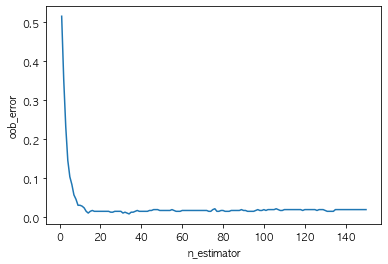

In [150]:
# ------------------- n_estimator 값 선정을 위한 --------oob error 확인----------------------------
oob_error = []

for v_n_estimator in range(1,151):
    rf = RandomForestClassifier(n_estimators=v_n_estimator, oob_score= True, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)
    
    
plt.plot(range(1,151), oob_error)
plt.ylabel("oob_error")
plt.xlabel("n_estimator")



In [151]:
# n_estimator = 40 로 결정

para_depth = [depth for depth in range(7,20)]
para_leaf = [leaf for leaf in range(1, 11)]


estimator = RandomForestClassifier(n_estimators=90, random_state=1234)

param_grid = {'max_depth':para_depth, 
              'min_samples_leaf':para_leaf,
              'criterion':['gini', 'entropy'],
              'bootstrap':[True, False]}

grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

best parameter: 
{'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}

best score:
0.987


In [152]:
# max _ depth

rf_final = RandomForestClassifier(bootstrap= False, criterion= 'gini', max_depth=10, min_samples_leaf= 1, random_state=1234)
rf_final.fit(df_train_x, df_train_y)

y_pred = rf_final.predict(df_test_x)

v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values('Importance',ascending = False, inplace=True)
df_importance.round(3)

,Feature,Importance
26,ROLLING_TEMP_T5,0.338
27,SUB_TEMP,0.245
22,FUR_HZ_TEMP,0.085
19,PT_WDTH,0.079
0,STEEL_KIND_C0,0.054
24,FUR_SZ_TIME,0.044
21,PT_WGT,0.040
25,FUR_TIME,0.032
18,PT_THK,0.022
20,PT_LTH,0.019


Text(0, 0.5, '변수')

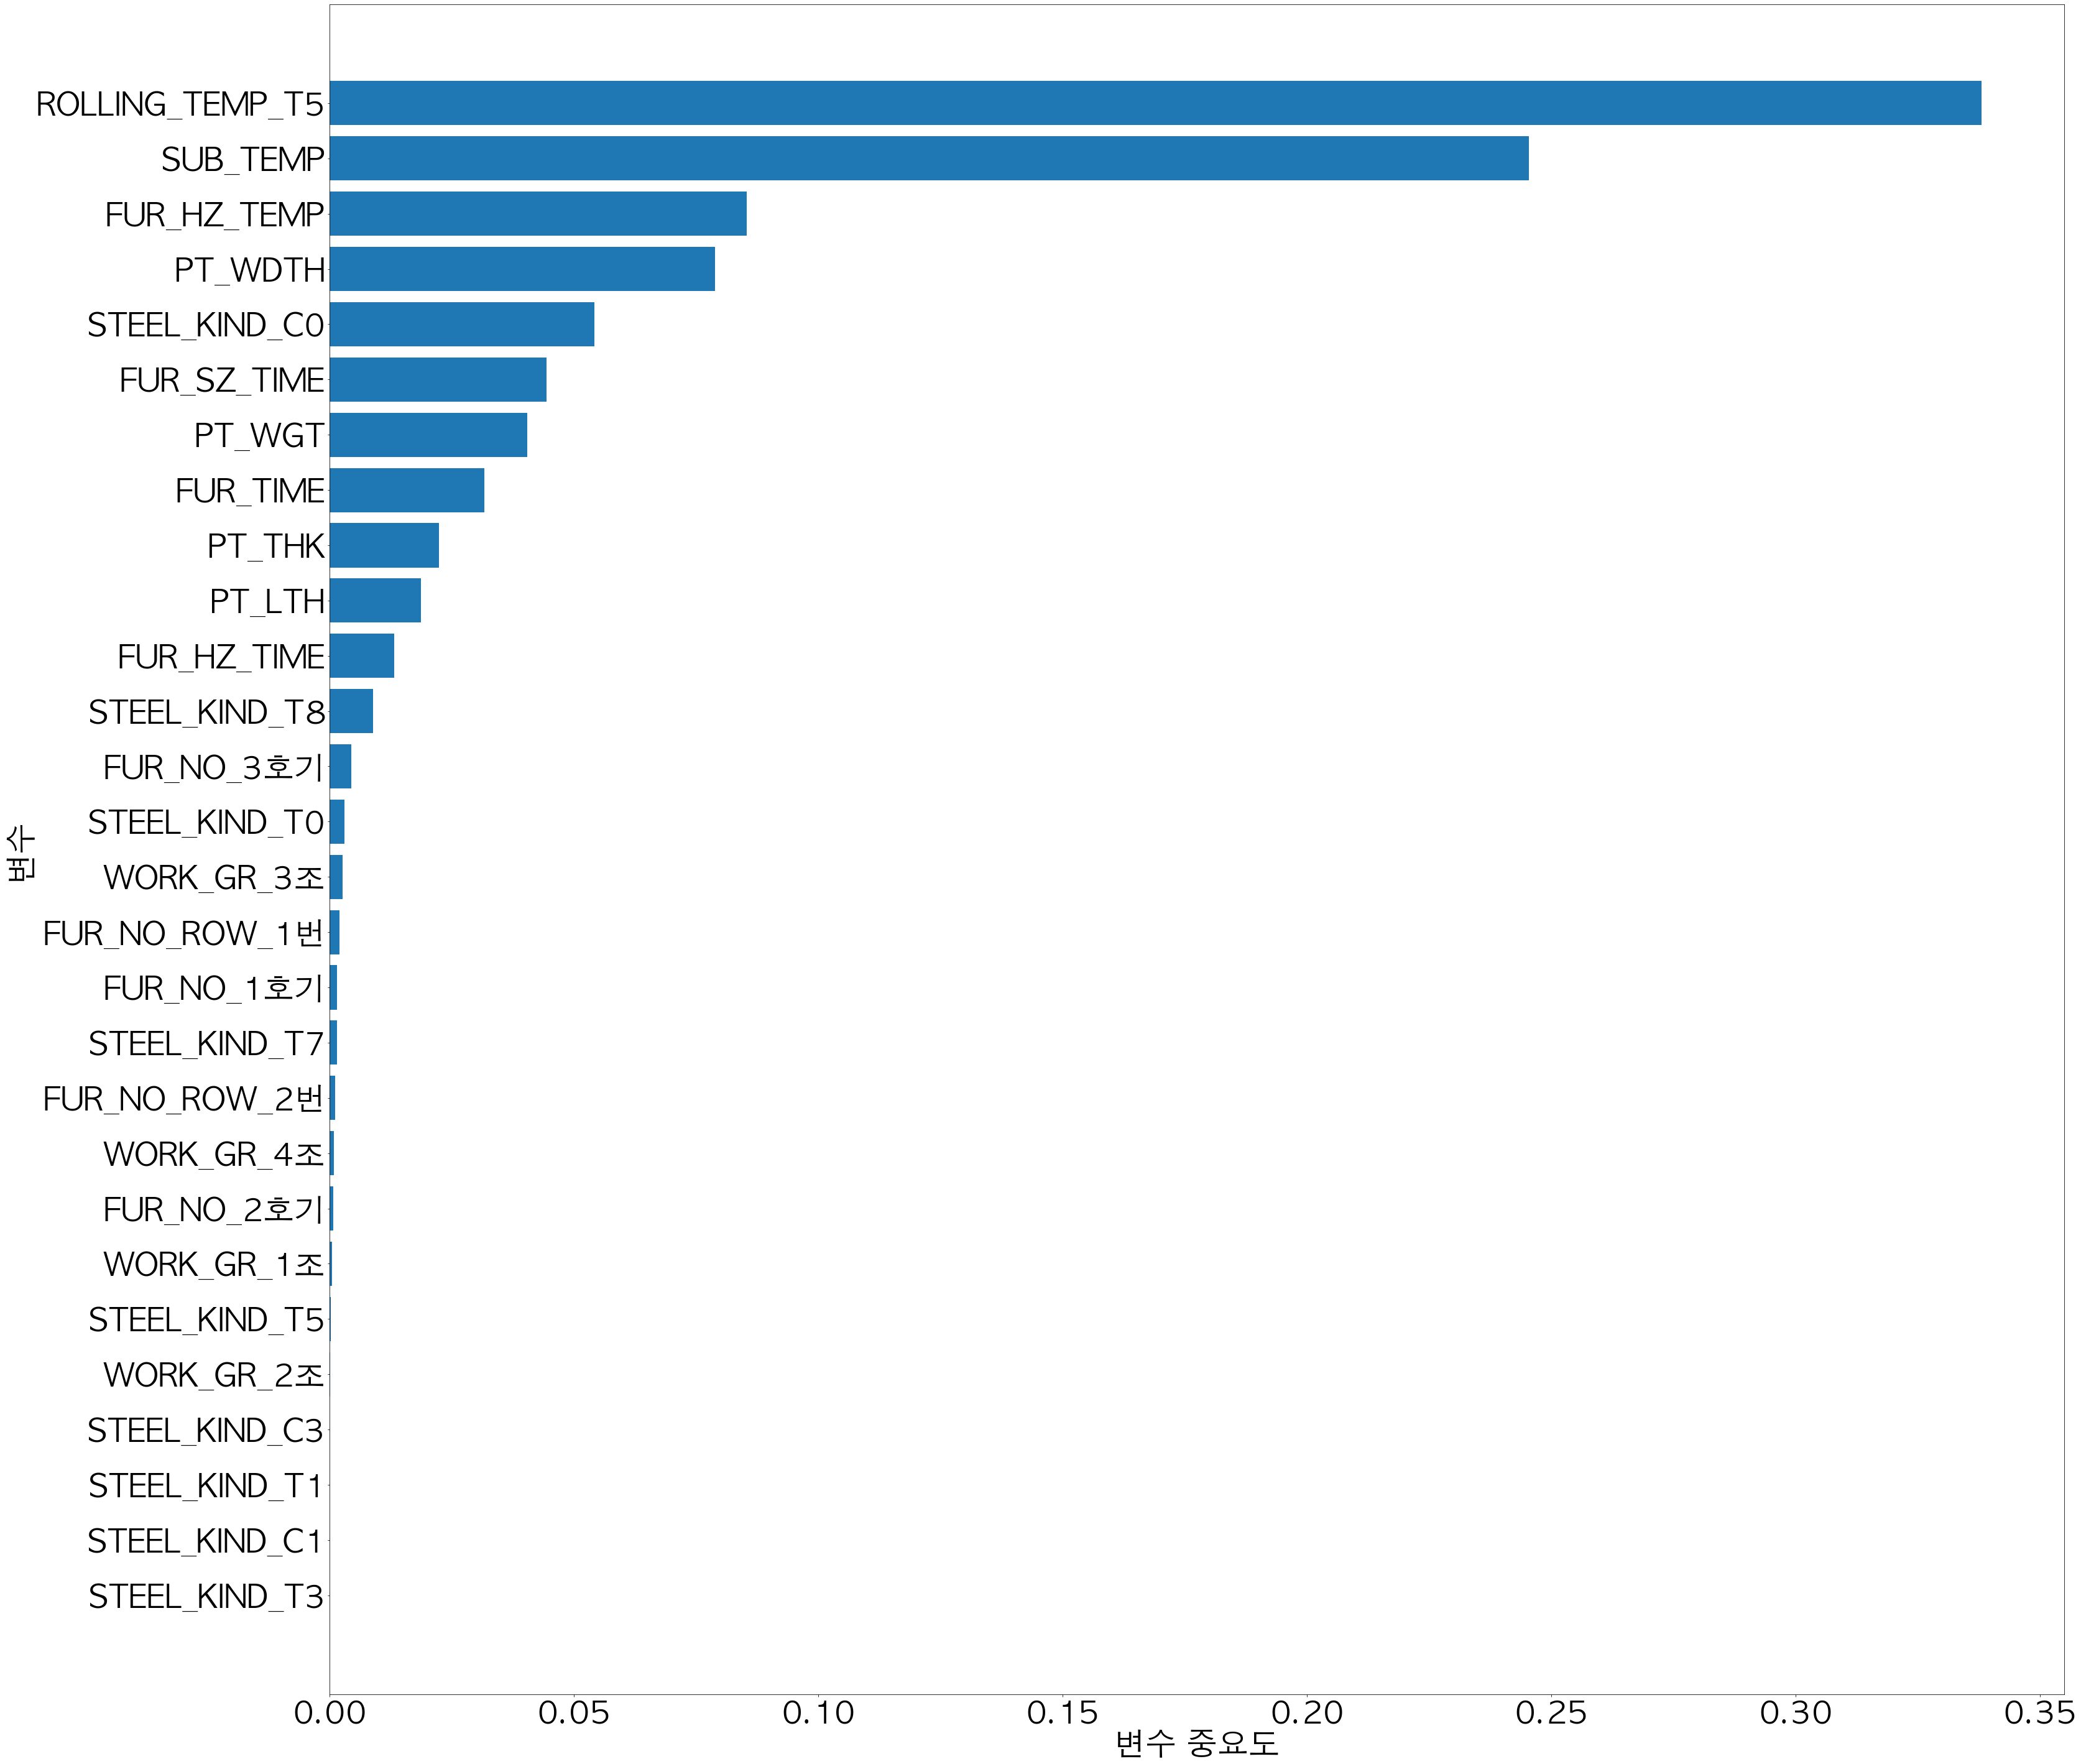

In [153]:
plt.figure(figsize=(50, 50))
plt.rc('font', size = 50)
df_importance.sort_values('Importance',ascending = True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')


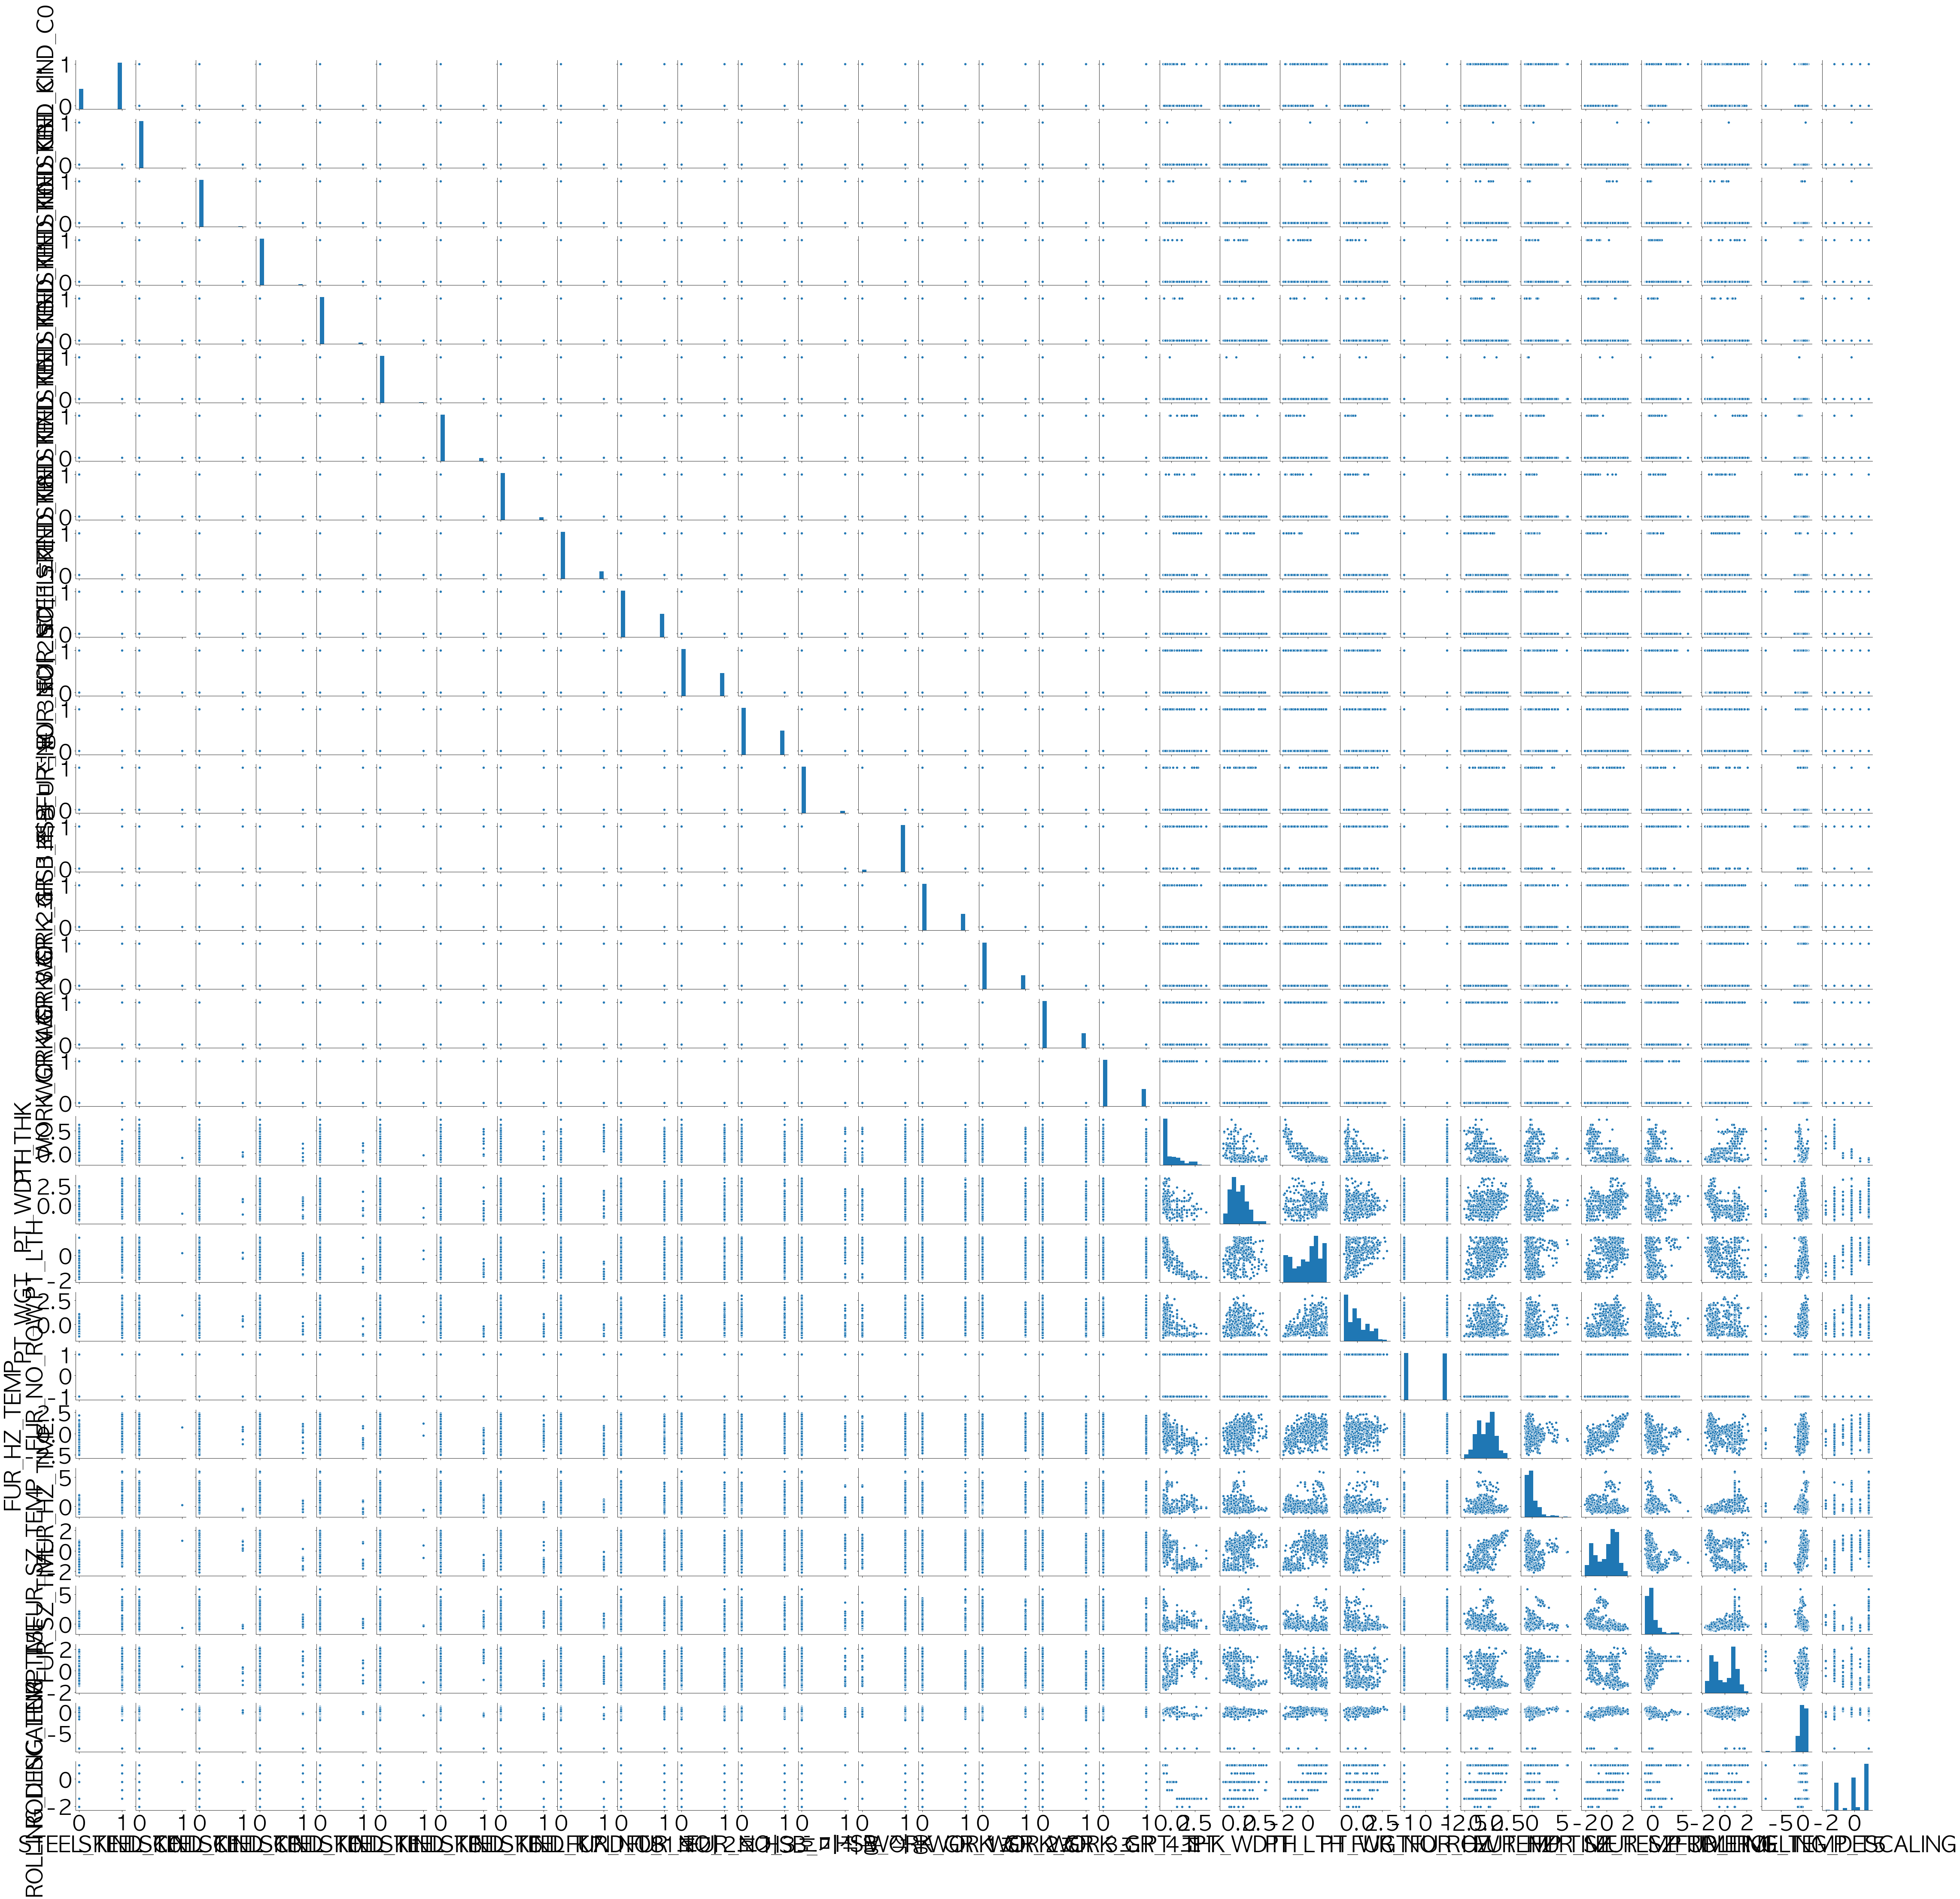

In [82]:
sns.pairplot(df_x)

In [154]:
######################### 변수중요도 분석을 통한 주요변수 추출 #####################################33


# --------------------- 기준 :  feature's importance 지수가 0.01 이상인 변수들만 추출 ------------------------------


importance_col = ["ROLLING_TEMP_T5",
                    "SUB_TEMP",
                    "PT_THK",
                    "FUR_SZ_TIME",
                    "FUR_HZ_TEMP",
                    "PT_WDTH",
                    "PT_LTH",
                    "PT_WGT",
                    "FUR_TIME",
                    "FUR_HZ_TIME"]

In [155]:
#################### 데이터 드랍 ##################################


df_x_final = df_x.loc[:, importance_col]
############################ 모델링에 활용할 최종 설명변수 df_x_final ##########################
df_train_x_final



,ROLLING_TEMP_T5,SUB_TEMP,HSB_적용,PT_THK,ROLLING_DESCALING,FUR_SZ_TIME,FUR_HZ_TEMP,PT_WDTH,HSB_미적용,PT_LTH,PT_WGT,FUR_TIME,FUR_HZ_TIME
0,0.000734,-0.165690,1,0.155812,-0.196930,-0.544097,-0.543782,1.738951,0,-1.390441,-1.103810,-0.409268,0.729972
1,0.028567,-0.175584,1,0.155812,-0.196930,-0.708951,-0.543782,1.738951,0,-1.390441,-1.103810,-0.387221,0.889399
2,-0.416748,0.160825,1,0.209106,-0.196930,-0.654000,-1.263141,1.568896,0,-1.095771,-0.944112,-0.409268,0.729972
3,-0.453858,0.259769,1,0.209106,-0.196930,-0.296815,-0.160124,1.568896,0,-1.095771,-0.944112,0.340311,0.969113
4,-0.565186,0.388395,1,0.473482,-0.196930,-0.846330,-0.735611,0.562094,0,-1.518889,-1.174562,0.296219,1.208255
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.659429,-0.561464,1,-0.476916,-0.196930,-0.461669,0.799021,1.493531,0,0.312308,-0.792904,-1.224987,-0.439164
716,0.121341,0.061881,1,-0.741293,1.036021,-0.489145,-0.256038,0.782392,0,1.006578,-0.935621,-1.379312,-0.731448
717,0.130618,-0.007380,1,-0.661875,1.036021,-0.049533,0.655149,1.224921,0,0.677679,-0.885084,-1.180894,-0.625163
718,0.056399,0.071775,1,-0.714646,1.036021,-0.928757,1.134722,1.074191,0,1.043267,1.566994,-1.269080,-0.067166


In [156]:
# 데이터 분리


df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_final, df_y, test_size = 0.3, random_state = 1234)

print(df_train_x.shape)
print(df_train_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(452, 10)
(452,)
(195, 10)
(195,)


# Classification model

### ---1-------------------------gradient boosting-------------------------

In [157]:
train_a = []; test_a = []

para_ntree = [n * 10 for n in range(1,16)]

for v_n_estimators in para_ntree:
    model = GradientBoostingClassifier(n_estimators = v_n_estimators,learning_rate=0.1, random_state=1234)
    model.fit(df_train_x, df_train_y)
    train_a.append(model.score(df_train_x, df_train_y))
    test_a.append(model.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimator'] = para_ntree
df_score_n['TrainScore'] = train_a
df_score_n['testScore'] = test_a
df_score_n.round(3)

,n_estimator,TrainScore,testScore
0,10,0.996,0.969
1,20,0.998,0.964
2,30,0.998,0.964
3,40,0.998,0.969
4,50,1.000,0.964
5,60,1.000,0.964
6,70,1.000,0.964
7,80,1.000,0.964
8,90,1.000,0.964
9,100,1.000,0.964


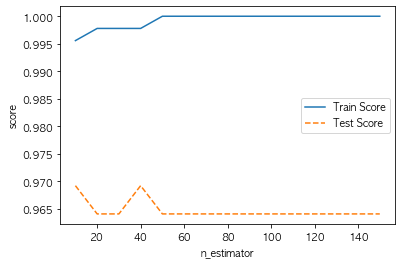

In [159]:
plt.rc('font', size = 10)


plt.plot(para_ntree, train_a, linestyle = "-", label = "Train Score")
plt.plot(para_ntree, test_a, linestyle = "--", label = "Test Score")

plt.ylabel("score"); plt.xlabel("n_estimator")
plt.legend()

### n_estimator = 40으로 선정

In [160]:
estimator = GradientBoostingClassifier(n_estimators= 40, learning_rate=0.1, random_state=1234)

para_depth = [depth for depth in range(1,11)]
para_leaf = [leaf*10 for leaf in range(1, 11)]


param_grid = {'max_depth':para_depth, 
              'min_samples_leaf':para_leaf,}

gb = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(gb.best_estimator_))
print("\nbest parameter: \n{}".format(gb.best_params_))
print("\nbest score:\n{}".format(gb.best_score_.round(3)))

best estimator model: 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=40,
                           n_iter_no_change=None, presort='auto',
                           random_state=1234, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

best parameter: 
{'max_depth': 2, 'min_samples_leaf': 10}

best score:
0.985



### ---2---------------------------- svm ------------------------------------------------------------

In [161]:
estimator = SVC(random_state=1234)

para_c = [10 ** c for c in range(-2,2)]
para_gamma = [10 ** gamma for gamma in range(-2, 2)]


param_grid_svm = {'C' : para_c, "gamma" : para_gamma}


svm_ = GridSearchCV(estimator, param_grid_svm, scoring="accuracy", n_jobs=-1)
svm_.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(svm_.best_estimator_))
print("\nbest parameter: \n{}".format(svm_.best_params_))
print("\nbest score:\n{}".format(svm_.best_score_.round(3)))

best estimator model: 
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

best parameter: 
{'C': 10, 'gamma': 0.1}

best score:
0.942


### ---3------------------- Decision Tree --------------------------------------

In [162]:
estimator = DecisionTreeClassifier()

para_leaf = [n_leaf for n_leaf in range(1,20)]
para_split = [n_split*2 for n_split in range(2,20)]
para_depth = [depth for depth in range(1,11)]

param_grid = {'max_depth':para_depth,'min_samples_split':para_split, 'min_samples_leaf':para_leaf}
grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

best parameter: 
{'max_depth': 2, 'min_samples_leaf': 6, 'min_samples_split': 4}

best score:
0.989


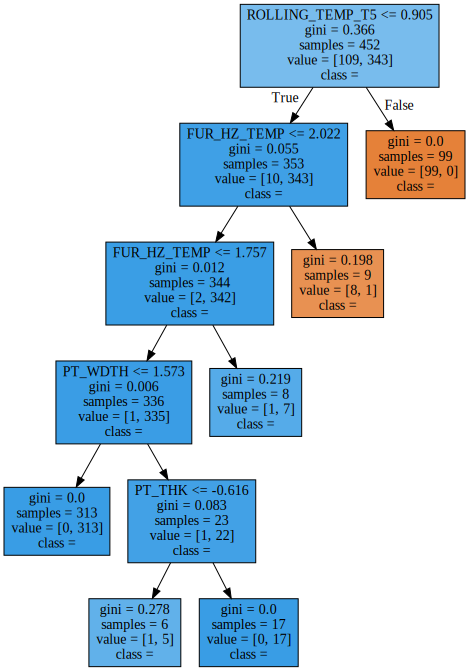

'decision_tree.pdf'

In [163]:

tree_high = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=6)
tree_high.fit(df_train_x, df_train_y)


export_graphviz(tree_high, out_file="decision_tree.dot", class_names=['불량', '양품'],
               feature_names=importance_col, impurity=True, filled=True, )


with open("decision_tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


# 트리 결과 이미지로 저장
dot = graphviz.Source(dot_graph)
dot.render(filename='decision_tree')

### ---4------------------------ Random Forest --------------------------

In [164]:
# n_estimators 선정

oob_error = []

for v_n_estimators in range(1,151):
    rf = RandomForestClassifier(n_estimators = v_n_estimators,oob_score = True,random_state = 1234)
    rf.fit(df_train_x,df_train_y)
    oob_error.append(1-rf.oob_score_)
    

Text(0.5, 0, 'n_estimators')

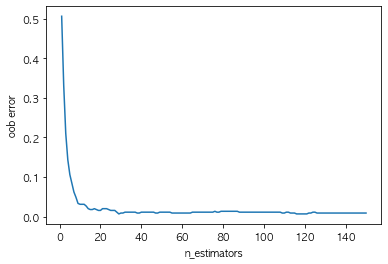

In [165]:
plt.plot(range(1,151),oob_error)
plt.ylabel('oob error')
plt.xlabel('n_estimators')

In [166]:
estimator = RandomForestClassifier(n_estimators=40,random_state=1234)

para_leaf = [n_leaf for n_leaf in range(1,20)]
para_split = [n_split*2 for n_split in range(2,20)]
para_depth = [depth for depth in range(1,11)]

param_grid = {'max_depth':para_depth,'min_samples_split':para_split, 'min_samples_leaf':para_leaf}
grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

best parameter: 
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 8}

best score:
0.987


In [168]:
# tree_high = RandomForestClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=8)
# tree_high.fit(df_train_x, df_train_y)

# estimator = tree_high.estimator_[2]

# export_graphviz(estimator, out_file="RandomForest_tree.dot", class_names=['불량', '양품'],
#                feature_names=importance_col, impurity=True, filled=True, )


# with open("RandomForest_tree.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))


# # 트리 결과 이미지로 저장
# dot = graphviz.Source(dot_graph)
# dot.render(filename='RandomForest_tree')

### ---5----------------------- 인공신경망 ----------------------------------

In [169]:
estimator = MLPClassifier(random_state=1234)

para_solver = ['lbfgs','sgd','adam']
para_function = ['logistic','tanh','relu']
para_hidden = [hidden * 20 for hidden in range(1,11)]
para_batch = [20* batch for batch in range(1, 10)]

param_grid = {'hidden_layer_sizes':(para_hidden, para_hidden),
              'activation':para_function, 
              'solver':para_solver,
              'batch_size': para_batch}

mlp = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
mlp.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(mlp.best_estimator_))
print("\nbest parameter: \n{}".format(mlp.best_params_))
print("\nbest score:\n{}".format(mlp.best_score_.round(3)))

best estimator model: 
MLPClassifier(activation='tanh', alpha=0.0001, batch_size=20, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
              learning_rate='constant', learning_rate_init=0.001, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1234, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

best parameter: 
{'activation': 'tanh', 'batch_size': 20, 'hidden_layer_sizes': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200], 'solver': 'sgd'}

best score:
0.947


### ---6--------------------로지스틱 회귀분석 ------------------------------

In [170]:
for i in df_train_x.columns:
    print(i +"+")

ROLLING_TEMP_T5+
SUB_TEMP+
PT_THK+
FUR_SZ_TIME+
FUR_HZ_TEMP+
PT_WDTH+
PT_LTH+
PT_WGT+
FUR_TIME+
FUR_HZ_TIME+


In [171]:
## 목적변수와 설명변수 다시 합쳐야 로지스틱회귀분석 할수있어서 합침. 

df_train = pd.concat([df_train_y, df_train_x], axis=1)

print(df_train.head())

     SCALE  ROLLING_TEMP_T5  SUB_TEMP    PT_THK  FUR_SZ_TIME  FUR_HZ_TEMP  \
352      1        -0.271933  0.088475 -0.754896    -0.316295    -0.860344   
644      1         0.105266  0.124163 -0.675833    -0.073667     0.676680   
505      0         0.950192 -0.928631 -0.544235    -0.289336     0.532584   
437      1        -0.981068  0.695170  2.379019    -0.208460    -0.716248   
221      0         1.055808 -1.339042 -0.360621    -0.963300    -1.052472   

      PT_WDTH    PT_LTH    PT_WGT  FUR_TIME  FUR_HZ_TIME  
352  0.867852  0.202660 -0.510250 -1.263405    -0.898505  
644  1.262142  0.686584 -0.864832 -1.219107    -0.633842  
505 -0.158864  1.047056  0.758204  0.885027     3.759566  
437 -1.862899 -1.688923 -1.195857  1.948169     1.324665  
221 -0.888886  0.017555  0.080721 -0.909024     0.371878  


In [172]:
log_model = Logit.from_formula("""SCALE ~ 
                                    ROLLING_TEMP_T5+
                                    SUB_TEMP+
                                    PT_THK+
                                    FUR_SZ_TIME+
                                    FUR_HZ_TEMP+
                                    PT_WDTH+
                                    PT_LTH+
                                    PT_WGT+
                                    FUR_TIME+
                                    FUR_HZ_TIME""", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.153297
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  452
Model:                          Logit   Df Residuals:                      441
Method:                           MLE   Df Model:                           10
Date:                Mon, 23 Nov 2020   Pseudo R-squ.:                  0.7225
Time:                        14:30:00   Log-Likelihood:                -69.290
converged:                       True   LL-Null:                       -249.69
Covariance Type:            nonrobust   LLR p-value:                 2.040e-71
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.5114      0.888      6.210      0.000       3.772       7.251
ROLLING_TEMP_

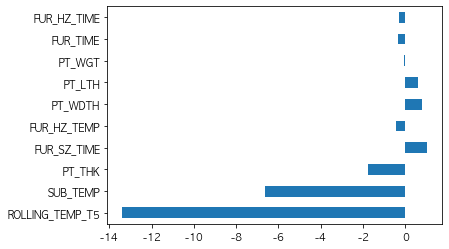

In [173]:
log_coef = pd.DataFrame({"Coef": log_result.params.values[1:]},
                       index = log_model.exog_names[1:])

log_coef.plot.barh(y = "Coef", legend = False)